In [1]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPVisionModel
from medclip import MedCLIPProcessor
from PIL import Image

/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = MedCLIPProcessor()
image = Image.open('example_data/view1_frontal.jpg')
inputs = processor(
    text=["lungs remain severely hyperinflated with upper lobe emphysema", 
        "opacity left costophrenic angle is new since prior exam ___ represent some loculated fluid cavitation unlikely"], 
    images=image, 
    return_tensors="pt", 
    padding=True
    )

# pass to MedCLIP model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
outputs = model(**inputs)
print(outputs.keys())

/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484612588/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another archi

load model weight from: ./pretrained/medclip-vit
dict_keys(['img_embeds', 'text_embeds', 'logits', 'loss_value', 'logits_per_text'])


In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT
from medclip import MedCLIPProcessor
from medclip import PromptClassifier
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True)
clf.to(device)

# prepare input image
from PIL import Image
image = Image.open('./example_data/view1_frontal.jpg')
inputs = processor(images=image, return_tensors="pt")

# prepare input prompt texts
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts
cls_prompts = process_class_prompts(generate_chexpert_class_prompts(n=10))
inputs['prompt_inputs'] = cls_prompts

# make classification
output = clf(**inputs)
print(output)
# {'logits': tensor([[0.5154, 0.4119, 0.2831, 0.2441, 0.4588]], device='cuda:0',
#       grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.se

load model weight from: ./pretrained/medclip-vit
sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54
{'logits': tensor([[0.3541, 0.4752, 0.1571, 0.2401, 0.3856]], grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


/opt/anaconda3/envs/medclip_eval/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


sample 10 num of prompts for Atelectasis from total 210
sample 10 num of prompts for Cardiomegaly from total 15
sample 10 num of prompts for Consolidation from total 192
sample 10 num of prompts for Edema from total 18
sample 10 num of prompts for Pleural Effusion from total 54


Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.se

load model weight from: ./pretrained/medclip-vit


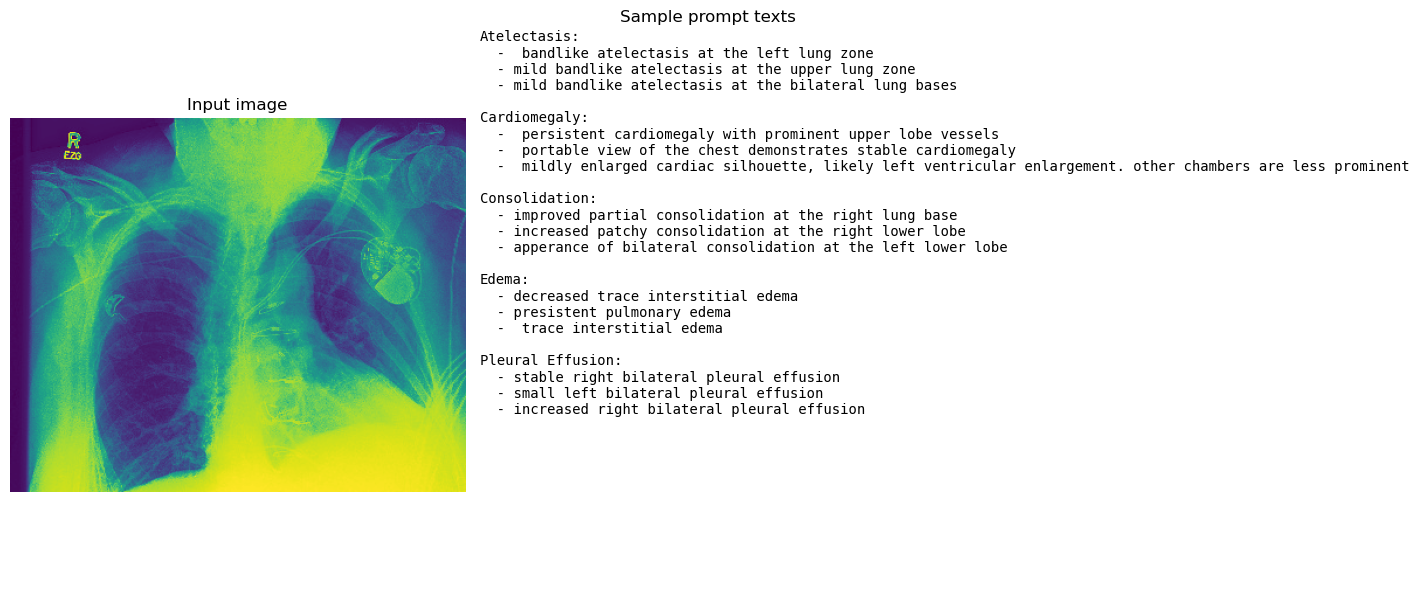

{'logits': tensor([[0.3620, 0.4742, 0.1550, 0.2303, 0.3822]], grad_fn=<StackBackward0>), 'class_names': ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']}


In [5]:
from medclip import MedCLIPModel, MedCLIPVisionModelViT, MedCLIPProcessor, PromptClassifier
from medclip.prompts import generate_chexpert_class_prompts, process_class_prompts
from PIL import Image
import torch, matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# image
image = Image.open('./example_data/view1_frontal.jpg')
processor = MedCLIPProcessor()
inputs = processor(images=image, return_tensors="pt")

# prompts: keep raw strings for display, and tokenized for the model
raw_prompts = generate_chexpert_class_prompts(n=10)
cls_prompt_inputs = process_class_prompts(raw_prompts)
inputs['prompt_inputs'] = cls_prompt_inputs

# model/classifier
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
clf = PromptClassifier(model, ensemble=True).to(device)

# visualize image + first few prompts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Input image')

lines = []
max_per_class = 3
for cls_name, prompts in raw_prompts.items():
    lines.append(f'{cls_name}:')
    for p in prompts[:max_per_class]:
        lines.append(f'  - {p}')
    lines.append('')

axes[1].axis('off')
axes[1].set_title('Sample prompt texts')
axes[1].text(0, 1, '\n'.join(lines), va='top', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()

# run classification
output = clf(**inputs)
print(output)

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raddar/chest-xrays-indiana-university")

print("Path to dataset files:", path)

Path to dataset files: /Users/liubeisong/.cache/kagglehub/datasets/raddar/chest-xrays-indiana-university/versions/2


In [6]:
import os
import torch

In [7]:
images_root = "/path/to/indiana/images"  # change this
img_path = os.path.join(images_root, "some_image.jpg")  # change to a valid filename

In [8]:
image = Image.open(img_path)

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/indiana/images/some_image.jpg'